In [106]:
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import nltk
nltk.download('stopwords')
from ast import literal_eval
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


data = pd.read_csv('C:\movies_metadata.csv')
data.columns

In [107]:
#data = data[:1000]

In [108]:
#cleaning the genres column to only contain values
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


ValueError: malformed node or string: ['Animation', 'Comedy', 'Family']

In [109]:
### converting to single values only

for i in range(len(data['genres'])-1):
    top = data['genres'][i]
    if (len(top)==0):
        top ='NA'
    else:
        top = top[0]
        data['TopGenres'][i] = top


c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
print(data[['TopGenres', 'genres', 'title']])

       TopGenres                        genres                        title
0      Animation   [Animation, Comedy, Family]                    Toy Story
1      Adventure  [Adventure, Fantasy, Family]                      Jumanji
2        Romance             [Romance, Comedy]             Grumpier Old Men
3         Comedy      [Comedy, Drama, Romance]            Waiting to Exhale
4         Comedy                      [Comedy]  Father of the Bride Part II
...          ...                           ...                          ...
45461      Drama               [Drama, Family]                       Subdue
45462      Drama                       [Drama]          Century of Birthing
45463     Action     [Action, Drama, Thriller]                     Betrayal
45464     Action                            []             Satan Triumphant
45465     Action                            []                     Queerama

[45466 rows x 3 columns]


In [101]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))

In [111]:
tag_dtm = vectorizer.fit_transform(data['TopGenres'])
tag_dtm

<1000x19 sparse matrix of type '<class 'numpy.int64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [50]:
print("Number of data points: ", tag_dtm.shape[0])#of entries
print("Number of unique tags: ", tag_dtm.shape[1]) #of total labels

Number of data points:  45466
Number of unique tags:  23


In [51]:
#some of the tags are:

tags = vectorizer.get_feature_names()
print("Some of the tags we have :" , tags[1:5])

Some of the tags we have : ['adventure', 'animation', 'aniplex', 'carousel productions']


In [52]:
### Number of times a tag appeared

In [53]:
#Lets now store the document term matrix in dictionary

freqs = tag_dtm.sum(axis=0).A1
print(freqs)

[ 6931  1514  1124     1     1  8820  1685  3415 11966   524   704   118
   279  2619   487   554     1  1191   647  1665   390   379   451]


In [54]:
count_tags = dict(zip(tags, freqs))
print(count_tags)

{'action': 6931, 'adventure': 1514, 'animation': 1124, 'aniplex': 1, 'carousel productions': 1, 'comedy': 8820, 'crime': 1685, 'documentary': 3415, 'drama': 11966, 'family': 524, 'fantasy': 704, 'foreign': 118, 'history': 279, 'horror': 2619, 'music': 487, 'mystery': 554, 'odyssey media': 1, 'romance': 1191, 'science fiction': 647, 'thriller': 1665, 'tv movie': 390, 'war': 379, 'western': 451}


In [57]:
#saving it to a CSV files. 

if not os.path.isfile('dt2tag_counts_dict_dtm.csv'):
    with open('dt2tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key,value])
tag_df = pd.read_csv("dt2tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,action,6931
1,adventure,1514
2,animation,1124
3,aniplex,1
4,carousel productions,1


In [58]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

print(tag_df_sorted)
print(tag_counts)

                    Tags  Counts
8                  drama   11966
5                 comedy    8820
0                 action    6931
7            documentary    3415
13                horror    2619
6                  crime    1685
19              thriller    1665
1              adventure    1514
17               romance    1191
2              animation    1124
10               fantasy     704
18       science fiction     647
15               mystery     554
9                 family     524
14                 music     487
22               western     451
20              tv movie     390
21                   war     379
12               history     279
11               foreign     118
16         odyssey media       1
4   carousel productions       1
3                aniplex       1
[11966  8820  6931  3415  2619  1685  1665  1514  1191  1124   704   647
   554   524   487   451   390   379   279   118     1     1     1]


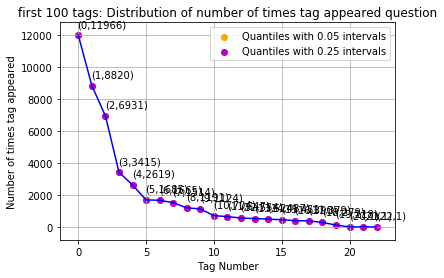

In [61]:
plt.plot(tag_counts, c='b')
plt.scatter(x=list(range(0,23)), y=tag_counts[0:23:], c='orange', label='Quantiles with 0.05 intervals')
plt.scatter(x=list(range(0,23)), y = tag_counts[0:23:], c='m', label = 'Quantiles with 0.25 intervals')

for x,y in zip(list(range(0,23)), tag_counts[0:23]):
    plt.annotate(s="({},{})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
    

plt.title('first 100 tags: Distribution of number of times tag appeared question')
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

In [62]:
###Top 20 tags

<Figure size 1440x720 with 0 Axes>

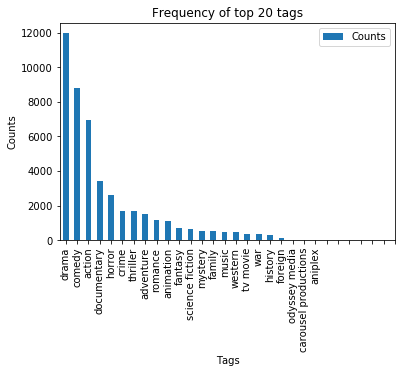

In [63]:
i= np.arange(30)
fig = plt.figure(figsize=(20,10))
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i,tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [64]:
### Data preprocessing

#1. removing HTML tags, punctuation, special characters
#2. remove alhpa numeric and covert to lowercase

In [65]:
def cleanHTML(sentence):
    cleanr=re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

In [66]:
# remove all punctuation
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,)|(|\|/)]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [67]:
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+',' ',word)
        alpha_sent+= alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [69]:
data['overview'] = data['overview'].str.lower()
data['overview'] = data['overview'].apply(cleanHTML)
data['overview'] = data['overview'].apply(cleanPunc)
data['overview'] = data['overview'].apply(keepAlpha)

In [70]:
print(data['overview'][1]) #print a particular synopsis

when siblings judy and peter discover an enchanted board game that opens the door to a magical world they unwittingly invite alan   an adult whos been trapped inside the game for   years   into their living room alans only hope for freedom is to finish the game which proves risky as all three find themselves running from giant rhinoceroses evil monkeys and other terrifying creatures


In [ ]:
#3. remove stopwords present in text using default set of stop-words from NLTK library

In [72]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero', 'one' , 'two' , 'three', 'four' , 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'may', 'also'
                  'across' , 'among', 'beside', 'however', 'yet', 'within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words)+ ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['overview'] = data['overview'].apply(removeStopWords)
print(data['overview'][1])

 siblings judy  peter discover  enchanted board game  opens  door   magical world  unwittingly invite alan    adult whos  trapped inside  game    years     living room alans  hope  freedom   finish  game  proves risky    find  running  giant rhinoceroses evil monkeys   terrifying creatures


In [73]:
#4. Stemming - using SnowBallStemmer

In [74]:
stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence+= stem
        stemSentence+= " "
    #print(stemSentence)
    stemSentence = stemSentence.strip()
    return stemSentence


In [76]:
data['preprocessed_data'] = data['overview'].apply(stemming)
print(data['overview'][1])

 siblings judy  peter discover  enchanted board game  opens  door   magical world  unwittingly invite alan    adult whos  trapped inside  game    years     living room alans  hope  freedom   finish  game  proves risky    find  running  giant rhinoceroses evil monkeys   terrifying creatures


In [77]:
###Splitting the data into test and training data

In [79]:
x = data['preprocessed_data']
y = data['TopGenres']

from sklearn.model_selection import train_test_split

In [81]:
#random_state = number of unique genres
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2, random_state=42)

In [82]:
print(y_test)

43526          Drama
6383           Drama
3154           Crime
10146         Horror
9531          Comedy
            ...     
4639     Documentary
33952          Drama
43788         Comedy
39680         Horror
14944         Action
Name: TopGenres, Length: 9094, dtype: object


In [85]:
## analysing tags

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 10, max_features = 20000, smooth_idf = True,  strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(x_train)
x_train_13char = vectorizer.transform(x_train)
x_test_13char = vectorizer.transform(x_test)


In [86]:
#building the model 

from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# f1_score import 
from sklearn.metrics import f1_score

In [87]:
##We will use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem:

In [88]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [89]:
##Finally, fit the model on the train set:

In [90]:
# fit model on train data
clf.fit(x_train_13char, y_train)

c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [91]:
# make predictions for validation set
y_pred = clf.predict(x_test_13char)

In [96]:
print(data['title'][1])
print(data['TopGenres'][1])

print(y_pred[1])

Jumanji
Adventure
Drama


In [97]:
# evaluate performance
f1_score(y_test, y_pred, average="micro")

0.4489773477017814

In [98]:
# f1_score import 
from sklearn.metrics import precision_score
print('The Macro precision score  is: ' , precision_score(y_test, y_pred,average='macro'))
print('The Micro precision score  is: ' , precision_score(y_test, y_pred,average='micro'))
print('The Weighted precision score  is: ' , precision_score(y_test, y_pred,average='weighted'))

The Macro precision score  is:  0.3027131533726348
The Micro precision score  is:  0.4489773477017814
The Weighted precision score  is:  0.4147930601352622


c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
